<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 1</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mesbahamirhossein@gmail.com">Amirhossein Mesbah</a><br></font><br>
    </div>
</div>

# Numpy

### Question1: mean and std of numbers between 10 and 1000.

<div dir="rtl">
میانگین و انحراف معیار ارایه ای از اعداد بین ۱۰ تا ۱۰۰۰
</div>

In [1]:
# IMPORT LIBRARIES
import numpy as np

arr = np.arange(10,1001,1)
sd = arr.std()
mean = arr.mean()

print("Standard Error is : ",sd)
print("Mean is : ",mean)




Standard Error is :  286.07691273501956
Mean is :  505.0


### Question2: nearest point to each random point.

<div dir="rtl">
در قسمت دوم میخواهیم نزدیک ترین نقطه به هر کدام از نقاط دیگر را پیدا کرده و ایندکس ان را نمایش دهیم.
</div>

In [2]:
def closest(X, p):
    disp = X - p
    #print(np.min((disp*disp).sum(1)))
    return np.argmin((disp*disp).sum(1))

X = np.random.random((100, 5))
for i in range(X.shape[0]):
    X1 = X
    X1 = np.delete(X1,i,axis = 0)
    print( closest(X1, X[i]) )

42
80
4
37
93
2
84
96
33
6
94
81
57
68
88
20
1
15
6
48
38
98
92
75
43
39
21
72
55
57
35
75
11
96
76
44
30
35
21
20
25
68
73
0
24
35
8
78
75
19
93
59
66
61
71
80
49
88
12
98
87
69
53
78
64
81
6
52
93
41
61
65
54
27
42
64
92
34
98
47
49
72
11
72
82
6
66
43
60
57
74
91
91
76
50
96
53
7
0
21


### Question3: Histogram of distances.

<div dir="rtl">
در این قسمت ابتدا 
matrix
فاصله ها را تولید کرده و در ادامه 
histogram
فاصله ها را می سازیم.
</div>

Text(0, 0.5, 'number')

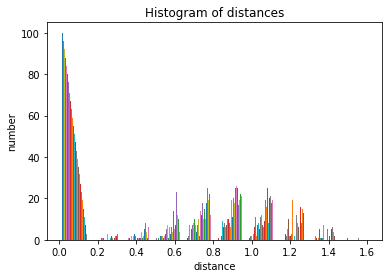

In [3]:
import matplotlib.pyplot as plt

m1 = np.linalg.norm(X[:, None, :] - X[None, :, :], axis=-1)
m2 = np.triu(m1)


fig, ax = plt.subplots(1, 1)
ax.hist(m2)

ax.set_title("Histogram of distances")
  
# adding labels
ax.set_xlabel('distance')
ax.set_ylabel('number')


### Question4:

Execute the cell below. By running this cell, a dataset will be loaded from `patents.csv` file. In this notebook, you are asked to analyze this data in several ways. There are three numpy arrays in this dataset:

- `patent_number`: a unique identifier for each patetnt
- `patent features`: a vector of 16 features describing several properties of each patent
- `category`: the category to which a patent belongs


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/patents.csv')
df.head()
patent_number = df['publication_number'].to_numpy()
patent_features = df['patent_embedding'].to_numpy()
temp = []
for i in range(patent_features.size):
    s = str(patent_features[i])
    s1 = s.replace(r'\n', '')
    temp.append(
        np.array(s.split()[1:-1], dtype='float')[:16]
    )

patent_features = np.stack(temp)
patent_category = df['category']
df.head()

,publication_number,title,cpc_code,patent_embedding,category
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6
2,KR-200146416-Y1,antitheft vehicle security system,B60R25/209,[-2.53110677e-02 -2.04547048e-02 8.63679312e-...,0
3,KR-0160422-B1,a door opening and shutting apparatus and meth...,D06F37/42,[ 1.21761542e-02 1.97522007e-02 -6.62921891e-...,1
4,US-952306-A,spray burner,B05B1/3033,[-0.00214472 0.01606156 -0.09518531 0.060160...,0


#### Part1: Which patent has the highest norm? (Eucledian distance from origin)

<div dir="rtl">
در این قسمت همان کار بخش قبل را انجام می دهیم با این تفاوت که به جای نزدیک ترین، دور ترین نقطه را از ارایه محاسبه می کنیم
.
همچنین ارایه و نقطه صفر مرکز را به عنوان ورودی تابع
furthest
می دهیم. که خروجی آن ایندکس دورترین نقطه از مرکز است.


In [11]:
def furthest(X, p):
    disp = X - p
    return np.argmax((disp*disp).sum(1))

#Origin
X = np.zeros((1, 16))
furthest_indx = furthest(patent_features, X )
print("index of the point with highest norm : ",furthest_indx,"\npatent_number : ",patent_number[furthest_indx])

index of the point with highest norm :  10839 
patent_number :  CH-527846-A


#### Part 2: Find the two patents that are the farthest from eachother

<div dir="rtl">
در این قسمت میخواهیم ایندکس دو نقطه ای که دورترین از هم هستند را پیدا کنیم.
اما متاسفانه هنگام فراخوانی تابع 
np
برای محاسبه ماتریس فاصله ها،
با مشکل کرش کردن هسته موجه می شویم.
</div>

In [7]:
distance_array = np.linalg.norm(patent_features[:, None, :] - patent_features[None, :, :], axis=-1)
distance_array = np.triu(distance_array)
ind = np.unravel_index(np.argmax(distance_array, axis=None), distance_array.shape)
print(ind)


: 

: 

#### Part 3: Write a function that, given a patent number, finds its nearest neighbour.

<div dir="rtl">
در این قسمت تابعی نوشتیم که ابتدا
patent_number
را به عنوان ورودی می گیرد و سپس ایندک آن را با استفاده از دستور
np.where
پیدا کرده و در ادامه نزدیک ترین نقطه به آن ایندکس را پیدا می کند.
در آخر نیز ایندکس آن را به عنوان خروجی می دهد.

In [12]:
def closest(X, p):
    disp = X - p
    return np.argmin((disp*disp).sum(1))

def Find_nearest(the_patent_number):
    indx = np.where(patent_number == the_patent_number)
    patent_features2 = patent_features
    patent_features2 = np.delete(patent_features2,indx,axis = 0)
    return closest (patent_features2, patent_features[indx])


print("patent number:",patent_number[Find_nearest('US-2019250858-A1')],"\n with index: ",Find_nearest('US-2019250858-A1'))

    

patent number: US-2015018028-A1 
 with index:  7514


#### Part 4: How many patents have a nearest neighbour that is in the same category?

In [18]:
#patent_category( Find_nearest('US-2019250858-A1') )
cat0 = 0   
cat1 = 0 
cat2 = 0 
cat3 = 0 
patent_category2 = patent_category.to_numpy()

for pn in patent_number :
    if( patent_category2[Find_nearest(pn)] == patent_category2[np.where(patent_number == pn) ]   ):
        if(patent_category2[Find_nearest(pn)] == 0):
            cat0 = cat0+1
        elif(patent_category2[Find_nearest(pn)] == 1):
            cat1 = cat1+1
        elif(patent_category2[Find_nearest(pn)] == 2):
            cat2 = cat2+1
        elif(patent_category2[Find_nearest(pn)] == 3):
            cat3 = cat3+1

ValueError: operands could not be broadcast together with shapes (15687,16) (2,16) 

#### Part 5: What is the average and std of distances between every pair of patents within a category? Using these calculated quantities, which cluster do you think is more condensed? Which one is more scattered?

# Working with different Data Files

## .txt

### Part 1: store words in a list

<div dir="rtl">
در این قسمت ابتدا فایل
zen_of_python.txt
را می خوانیم. سپس تمام کلمات را جدا کرده و در یک ارایه ذخیره می کنیم. همچنین تعداد تکرار هر یک از کلمات را نیز بدست می اوریم.
</div>

In [7]:


import string
  
# Open the file in read mode
text = open("./data/zen_of_python.txt", "r")
text = [line for line in text if line.strip() != ""]

# Create an empty dictionary
d = dict()
  
# Loop through each line of the file
for line in text:
    # Remove the leading spaces and newline character
    line = line.strip()
  
    # Convert the characters in line to
    # lowercase to avoid case mismatch
    line = line.lower()
  
    # Remove the punctuation marks from the line
    line = line.translate(line.maketrans("", "", string.punctuation))
  
    # Split the line into words
    words = line.split(" ")
  
    # Iterate over each word in line
    for word in words:
        # Check if the word is already in dictionary
        if word in d:
            # Increment count of word by 1
            d[word] = d[word] + 1
        else:
            # Add the word to dictionary with count 1
            d[word] = 1

arr = list( d.keys() )


### Part 2: Occurrence of each character

<div dir="rtl">
در این قسمت تعداد تکرار هر حرف را بدست می آوریم. برای این کار ابتدا یک حلقه بر روی همه خط ها و یک حلقه بر روی همه کلمات می زنیم و در انتها تعداد تکرار هر حرف را نمایش می دهیم.
</div>

In [8]:
freq_dict = dict()
  
# Loop through each line of the file
for line in text:
    line = line.strip()
    line = line.lower()
    line = line.translate(line.maketrans("", "", string.punctuation))
  
    for i in line: 
        if i in freq_dict: 
            freq_dict[i]=freq_dict[i] + 1
        else: 
            freq_dict[i] = 1

arr = list( freq_dict)
freq_dict

{'t': 83,
 'h': 32,
 'e': 94,
 ' ': 129,
 'z': 1,
 'n': 46,
 'o': 47,
 'f': 12,
 'p': 22,
 'y': 17,
 'b': 21,
 'i': 54,
 'm': 16,
 'r': 36,
 's': 46,
 'a': 55,
 'u': 24,
 'l': 34,
 'g': 11,
 'x': 6,
 'c': 22,
 'd': 18,
 'k': 2,
 'v': 5,
 'w': 5,
 '2': 1,
 '1': 2,
 '4': 1,
 '3': 1,
 '6': 1,
 '7': 2}

### Part 3: Occurrence of each word

<div dir="rtl">
در این قسمت تعداد تکرار هر کلمه را نمایش می دهیم.
</div>

In [9]:
word_freq = []
# Print the contents of dictionary
for key in list(d.keys()):
    word_freq.append(key+  " : "+ str( d[key] ))
word_freq

['the : 6',
 'zen : 1',
 'of : 3',
 'python : 1',
 'by : 1',
 'tim : 1',
 'peters : 1',
 'beautiful : 1',
 'is : 10',
 'better : 8',
 'than : 8',
 'ugly : 1',
 'explicit : 1',
 'implicit : 1',
 'simple : 1',
 'complex : 2',
 'complicated : 1',
 'flat : 1',
 'nested : 1',
 'sparse : 1',
 'dense : 1',
 'readability : 1',
 'counts : 1',
 'special : 2',
 'cases : 1',
 'arent : 1',
 'enough : 1',
 'to : 5',
 'break : 1',
 'rules : 1',
 'although : 3',
 'practicality : 1',
 'beats : 1',
 'purity : 1',
 'errors : 1',
 'should : 2',
 'never : 3',
 'pass : 1',
 'silently : 1',
 'unless : 2',
 'explicitly : 1',
 'silenced : 1',
 'in : 1',
 'face : 1',
 'ambiguity : 1',
 'refuse : 1',
 'temptation : 1',
 'guess : 1',
 'there : 1',
 'be : 3',
 'one : 3',
 'and : 1',
 'preferably : 1',
 'only : 1',
 'obvious : 2',
 'way : 2',
 'do : 2',
 'it : 2',
 'that : 1',
 'may : 2',
 'not : 1',
 'at : 1',
 'first : 1',
 'youre : 1',
 'dutch : 1',
 'now : 2',
 'often : 1',
 'right : 1',
 'if : 2',
 'implementa

### Part 4: Define a function for saving stats at the end of `.txt` file

<div dir="rtl">
یک تابع به نام
text_stats
می اسزیم که ادرس فایل را به عنوان ورودی می گیرد و در انتهای آن تعداد خط ها، تعداد کلمات و تعداد حروف را ذخیره می کند.
</div>

In [12]:
def text_stats(inF):

    num_lines = 0
    num_words = 0
    num_chars = 0

    with open(inF, 'r') as input_file:

        for line in input_file:
            line = line.translate(line.maketrans("", "", string.punctuation))
            line = line.replace(" -- ","")
            #print(line)
            num_lines += 1
            line_words = line.split()
            num_words += len(line_words)
            for word in line_words:
                num_chars += len(word)
				
				
	#input_file.close()


    file = open(inF, "a")	
    file.write('\nline count:' +  str(num_lines ) + '\nword count: ' + str(num_words ) +'\ncharacter count: ' + str(num_chars) + "\n" )

    print  ( 'line count: %i, word count: %i, character count: %i' % (num_lines, num_words, num_chars) )








### Part 5: Apply your defined function on 'zen_of_python.txt`

<div dir="rtl">
در این قسمت تابع بالا را فراخوانی می کنیم تا تعداد خط، کلمه و حروف فایل را در انتهای آن ذخیره کند.
</div>

In [13]:
text_stats("./data/zen_of_python.txt")

line count: 21, word count: 143, character count: 677


## csv

### Part 1: number of features and data points

<div dir="rtl">
در قسمت اول ابتدا داده ها را با استفاده از کتابخانه
pandas
می خوانیم. سپس تعداد سطر ها و ستون های داده ها را چاپ می کنیم:
</div>

In [14]:
import pandas as pd
df = pd.read_csv("./data/patents.csv")
df.shape

print("Number of Rows :",df.shape[0])
print("Number of Columns : ",df.shape[1])

Number of Rows : 15689
Number of Columns :  5


### Part 2: Name of Features

<div dir="rtl">
در این قسمت اسم ویژگی ها را چاپ می کنیم.
</div>

In [15]:
print("Name of the features are : ")
print(list(df.columns))


Name of the features are : 
['publication_number', 'title', 'cpc_code', 'patent_embedding', 'category']


### Part 3: Print Stats of Dataframe

<div dir="rtl">
در این قسمت با استفاده از متد 
describe
 کتابخانه
 pandas
 ، تمام داده های آماری ستون 
 category
 را بدست می اوریم و چاپ می کنیم.
</div>

In [16]:
df['category'].describe()

count    15689.000000
mean         3.854229
std          2.499307
min          0.000000
25%          1.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: category, dtype: float64

### Part 4: print rows.

<div dir="rtl">
در پارت چهارم و پنجم : ابتدا ۵ سطر اول دیتاست سپس ۵ سطر اخر و در انتها، ۵ سطر رندوم را نمایش می دهیم.


در پارت پنجم نیز نوع داده هر ستون را نمایش می دهیم.

</div>

In [17]:
# 5 first rows
df.head(5)

,publication_number,title,cpc_code,patent_embedding,category
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6
2,KR-200146416-Y1,antitheft vehicle security system,B60R25/209,[-2.53110677e-02 -2.04547048e-02 8.63679312e-...,0
3,KR-0160422-B1,a door opening and shutting apparatus and meth...,D06F37/42,[ 1.21761542e-02 1.97522007e-02 -6.62921891e-...,1
4,US-952306-A,spray burner,B05B1/3033,[-0.00214472 0.01606156 -0.09518531 0.060160...,0


In [18]:
# 5 last rows
df.tail(5)

,publication_number,title,cpc_code,patent_embedding,category
15684,AT-415717-T,method and device for produce a low pressure w...,H01M8/04104,[ 1.77878514e-02 3.53233777e-02 -3.37363742e-...,1
15685,AT-424202-T,substitute _NUMBER_ thio _NUMBER_ _NUMBER_ dic...,C07D417/12,[-0.03664465 -0.01075565 -0.02483719 -0.033502...,5
15686,CA-2952951-A1,end tip for a vehicle wiper blade,B60S1/3894,[-4.39246558e-02 2.96350904e-02 -2.31920835e-...,0
15687,CH-608317-A,process for the compressive shrinkage of a web...,D06C21/00,[-3.34328553e-03 1.02757774e-02 -2.01825500e-...,6
15688,CN-100513251-C,system and process for open cover vessel hull,B63B71/00,[-1.98921170e-02 3.07969116e-02 -2.46879123e-...,6


In [19]:
# 5 random row
df.sample(5)

,publication_number,title,cpc_code,patent_embedding,category
741,US-1922233-A,method and mean for pack collapsible tube and ...,B65D77/044,[-1.22533338e-02 2.40723472e-02 -5.39498292e-...,6
1638,KR-101385448-B1,circuit for drive source wire and display devi...,G09G3/3688,[-0.00333105 0.03246626 -0.01936602 0.041413...,6
8532,AT-195247-T,chelate preparation contain alpha diamine comp...,C07D333/22,[ 0.0026285 -0.01979233 -0.0516644 -0.015090...,2
7851,US-3877206-A,mow machine,A01D34/695,[ 4.56275195e-02 -1.38634816e-02 -3.80074233e-...,4
8845,CA-2354587-A1,method of control thermal therapy,A61B18/1815,[ 1.88784543e-02 -5.59109822e-03 -3.98243181e-...,3


In [20]:
# Each column dta type:
print("Data Type of each column is :")
df.dtypes

Data Type of each column is :


publication_number    object
title                 object
cpc_code              object
patent_embedding      object
category               int64
dtype: object

### Part 5: use iloc and loc to select rows

<div dir="rtl">
 رد این قسمت نیز ابتدا ویژگی 
 title
 سطر های ۱۰۲۴ تا ۲۰۴۸ را چاپ می کنیم.
 
 در مرحله اول این کار را با متد
 loc
 انجام می دهیم. این متد برای انتخاب بر اساس سطر ها است(بر خلاف 
 iloc
  که باید به آن ورودی شماره ستون داده شود.
  )
  
  سپس در مرحله دوم از متد
  iloc
  استفاده می کنیم. یکی دیگر از تفاوت های این دو متد این است که در 
  loc
  عدد اخر نوشته شده، در داده های خروجه است، اما در 
  iloc
  اخرین عدد انتخابی در داده های خروجی نیست.
</div>

In [21]:
# loc
df.loc[1024:2048,'title']

1024    device for purple coupling of rotatable axle o...
1025                                     heat pump system
1026    condensation dryer comprise a heat pump and me...
1027                     animal _NUMBER_ plead ingredient
1028                      electrostatic dust precipitator
                              ...                        
2044                  crystalline anti htnfalpha antibody
2045    method information processing apparatus and co...
2046        pork rind bait and method of prepare the same
2047    process for the treatment of titanium contain ...
2048    air condition system of a motor vehicle and me...
Name: title, Length: 1025, dtype: object

In [22]:
# iloc
df.iloc[1024:2049,1]


1024    device for purple coupling of rotatable axle o...
1025                                     heat pump system
1026    condensation dryer comprise a heat pump and me...
1027                     animal _NUMBER_ plead ingredient
1028                      electrostatic dust precipitator
                              ...                        
2044                  crystalline anti htnfalpha antibody
2045    method information processing apparatus and co...
2046        pork rind bait and method of prepare the same
2047    process for the treatment of titanium contain ...
2048    air condition system of a motor vehicle and me...
Name: title, Length: 1025, dtype: object

### Part 5: Check Dataframe for NaN values

<div dir="rtl">
در این بخش بررسی می کنیم که ایا دیتاست دارای مقدار 
Nan
است یا خیر.
</div>

In [23]:
print("Is there any column with NaN values?")
print (df.isna().any() )
print("So Does the entire data set Have NaN values? : ", df.isnull().values.any())


Is there any column with NaN values?
publication_number    False
title                 False
cpc_code              False
patent_embedding      False
category              False
dtype: bool
So Does the entire data set Have NaN values? :  False


<div dir="rtl">
همانطور که از نتیجه بالا معلوم است، دیتاست دارای داده های 
NaN
نیست.
</div>

### Part 6: Check Dataframe for duplicates

<div dir="rtl">
در این قسمت چک می کنیم ایا دیتاست دارای سطر های تکراری است یا خیر و اگر هست، آن ها را نمایش می دهیم.

</div>

In [24]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,publication_number,title,cpc_code,patent_embedding,category
1739,AU-2011202417-A1,a wall form in soil the wall include a hollow ...,E02D5/18,[ 3.92072555e-03 3.35453786e-02 -2.88293511e-...,1
5696,EP-3096560-A4,method and user equipment for block network ac...,H04W48/06,[-3.0044878e-02 -4.4037402e-05 -2.3655588e-02 ...,6
6496,US-2018076003-A1,method and apparatus for a porous electrospray...,H01J37/08,[ 0.02056626 0.04025198 -0.04704187 0.061253...,1
6962,US-2018328001-A1,boom assembly for a trencher,E02F5/14,[ 1.52878952e-03 3.42151672e-02 -4.17193323e-...,1
9408,JP-5702147-B2,electroactive material,H01L51/0035,[ 0.01078738 -0.01581865 -0.01463019 0.023458...,2
9980,JP-6373410-B2,end of life determination and prediction for i...,A61N1/36128,[-3.00560612e-03 5.31513337e-03 -1.25307012e-...,6
11142,AU-2012324531-A1,biomarkers useful for detection of type grade ...,C12Q1/6886,[ 0.01898381 0.01144431 -0.04808485 0.079074...,1
13850,US-2018042871-A1,bicyclic analgesic compound,A61K31/16,[ 4.39326465e-02 -1.77983195e-02 -8.26886818e-...,2
14823,HK-1225899-A1,apparatus system and method of secure communic...,H04W12/04,[-0.00121724 -0.00263928 0.0009811 0.056798...,6


### Part 7: Use `Lambda` Function for calculating word counts

<div dir="rtl">
در این قسمت نیز با استفاده از یک تابع 
Lambda
تعداد کلمات موجود در ویژگی 
title
را برای هر سطر محاسبه کرده و در متغیر
title_length
ذخیره می کنیم.
</div>

In [25]:
df['title_length'] = df.title.apply(lambda x: len(x.split()))
df

,publication_number,title,cpc_code,patent_embedding,category,title_length
0,US-2019250858-A1,memory controller and operating method thereof,G06F3/061,[ 0.00135472 0.01564001 -0.04858465 0.039866...,1,6
1,US-1000462-A,corn planter,A01C9/00,[-4.44490612e-02 2.48770583e-02 -5.62837869e-...,6,2
2,KR-200146416-Y1,antitheft vehicle security system,B60R25/209,[-2.53110677e-02 -2.04547048e-02 8.63679312e-...,0,4
3,KR-0160422-B1,a door opening and shutting apparatus and meth...,D06F37/42,[ 1.21761542e-02 1.97522007e-02 -6.62921891e-...,1,12
4,US-952306-A,spray burner,B05B1/3033,[-0.00214472 0.01606156 -0.09518531 0.060160...,0,2
...,...,...,...,...,...,...
15684,AT-415717-T,method and device for produce a low pressure w...,H01M8/04104,[ 1.77878514e-02 3.53233777e-02 -3.37363742e-...,1,17
15685,AT-424202-T,substitute _NUMBER_ thio _NUMBER_ _NUMBER_ dic...,C07D417/12,[-0.03664465 -0.01075565 -0.02483719 -0.033502...,5,13
15686,CA-2952951-A1,end tip for a vehicle wiper blade,B60S1/3894,[-4.39246558e-02 2.96350904e-02 -2.31920835e-...,0,7
15687,CH-608317-A,process for the compressive shrinkage of a web...,D06C21/00,[-3.34328553e-03 1.02757774e-02 -2.01825500e-...,6,12


### Part 8: Plot Histogram of Word counts

<div dir="rtl">
هیستوگرام ویژگی ایجاد شده را نمایش می دهیم.
</div>

array([[<AxesSubplot:title={'center':'title_length'}>]], dtype=object)

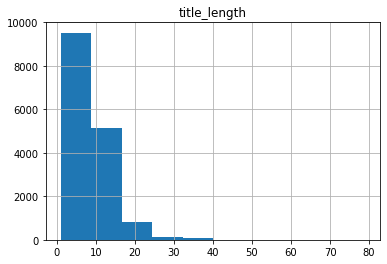

In [26]:
df.hist(column='title_length') 

## Log

### Part 1: Number of Total Commits

<div dir="rtl">
در قسمت اول یک تابع برای تبدیل فایل لاگ به دیتافریم می نویسیم که اطلاعات مهم لاگ را در آن ذخیره کنیم.
همانطور که میبینیم این تابع فایل لاگ را به عنوان ورودی گرفته و دیتافریم را خروجی می دهد.
سپس تعداد کل کامیت ها و ۵ سطر اول این دیتافریم را نمایش می دهیم.
</div>

In [27]:
import pandas as pd
filename = './data/git_log.log'
# reading

In [28]:
def log_to_dataframe(location):
    with open(location, mode='r', encoding='UTF-8') as f:
        commit_list = []
        Author_list = []
        email_list = []
        Date_list = []
        for line in f:
            if line.startswith('commit'):
                commit = line.split(" ")[1].rstrip()
                commit_list.append(commit)
            elif "Author:" in line:
                Author = line.split(": ")[1].rstrip()
                email = Author.split(" <")[1][:-1]
                Author = Author.split(" <")[0]
                Author_list.append(Author)
                email_list.append(email)
            elif "Date:" in line:
                date = line.split(": ")[1].rstrip()
                Date_list.append(date)
            else:
                pass
    main_df = pd.DataFrame({"commit": commit_list, "Auther": Author_list, "Email": email_list, "Date": Date_list})
    return main_df


log_df = log_to_dataframe('./data/git_log.log')

print("number of total commits :" ,log_df.shape[0])
log_df.head()

number of total commits : 536


,commit,Auther,Email,Date
0,4d3d9de655faa813781027d8b1baed819c6a56fe,Markus Harrer,feststelltaste@googlemail.com,Tue Mar 5 22:32:20 2019 +0100
1,b836a492b2d5916397be9880f548121a9b398db1,Markus Harrer,feststelltaste@googlemail.com,Tue Mar 5 13:38:07 2019 +0100
2,3a16dd99f4e7758a38b17e911eb78ba1dc7d871f,Markus Harrer,feststelltaste@googlemail.com,Tue Mar 5 13:35:38 2019 +0100
3,7575b4731833a782f3de5d4686e9a0e3e2349ca6,Markus Harrer,feststelltaste@googlemail.com,Tue Mar 5 13:34:35 2019 +0100
4,208f665e17f3d8650b82f1169bbb5fab7e67807b,Markus Harrer,feststelltaste@googlemail.com,Thu Nov 15 18:39:27 2018 +0100


### Part 2: Extract Developer name, Email, Commit Count and last commit date and create a Dataframe

<div dir="rtl">
در این قسمت برای هر دولوپر تعداد کامیت ها و ایمیل و تاریخ اخرین کامیت را باید نمایش دهیم.
برای این کار ابتدا ستون 
Date
را به فرمت تاریخ در می اوریم تا بتوانیم سطر ها را بر اساس تاریخ کامیت ها مرتب کنیم.
سپس دیتاست را بر اساس تعداد نویسنده ها گروه بندی می کنیم.
سپس یک تابع نوشته و به ازای هر نویسنده، تعداد
commits
 و ایمل و تاریخ اخرین کامیت را نمایش می دهیم.
</div>

In [30]:
log_df2 = log_df.copy()
log_df2['Date'] =pd.to_datetime(log_df2.Date)
ds = log_df2.groupby('Auther').size()
#print (ds.index.tolist())
# Find out who has max and min ccommits
Max_Num_of_commits = 0
Min_Num_of_commits = 1
Auther_with_max_commits = []
Auther_with_min_commits = []

for Auther in ds.index.tolist():
    print(Auther)
    print("Number of commits : ",ds[Auther])
    tmp = log_df2.loc[log_df2['Auther'] == Auther]
    #print(tmp.sort_values('Date',ascending=False).reset_index(    ) )
    print(tmp.sort_values('Date',ascending=False).reset_index(    ).loc[0,['Email','Date']] )
    print("\n\n")

    if (ds[Auther] > Max_Num_of_commits):
        Auther_with_max_commits.append( Auther )
        Max_Num_of_commits = ds[Auther]
    elif((ds[Auther] == Max_Num_of_commits)):
        Auther_with_max_commits.append( Auther )

    if (ds[Auther] < Min_Num_of_commits):
        Auther_with_min_commits.append( Auther )
        Min_Num_of_commits = ds[Auther]
    elif((ds[Auther] == Min_Num_of_commits)):
        Auther_with_min_commits.append( Auther )




Ameya Pandilwar
Number of commits :  2
Email          ameya@pandilwar.com
Date     2016-06-19 02:23:53-04:00
Name: 0, dtype: object



AndrejGajdos
Number of commits :  1
Email                      Andrej1
Date     2016-07-28 13:50:07+02:00
Name: 0, dtype: object



Antoine Rey
Number of commits :  64
Email        antoine.rey@gmail.com
Date     2016-08-19 18:54:56+02:00
Name: 0, dtype: object



Attilio
Number of commits :  1
Email             attilio@attil.io
Date     2016-06-15 22:46:47+02:00
Name: 0, dtype: object



Bram Luyten
Number of commits :  1
Email                 bram@mire.be
Date     2014-05-11 18:37:42+02:00
Name: 0, dtype: object



Chris Beams
Number of commits :  1
Email            cbeams@vmware.com
Date     2010-09-02 07:51:24+00:00
Name: 0, dtype: object



Colin But
Number of commits :  1
Email    colinbut@users.noreply.github.com
Date             2015-11-20 13:56:44+00:00
Name: 0, dtype: object



Costin Leau
Number of commits :  28
Email             cleau@vmware.

### Part 3: Developers with Maximum and Minimum Commit count

<div dir="rtl">
هیستوگرام ویژگی ایجاد شده را نمایش می دهیم.
</div>

In [31]:
print ("Authers with maximum Commits are : \n" , Auther_with_max_commits )

print ( "\nAuthers with minimum Commits are : \n" , Auther_with_min_commits )
 

Authers with maximum Commits are : 
 ['Ameya Pandilwar', 'Antoine Rey', 'Mic']

Authers with minimum Commits are : 
 ['AndrejGajdos', 'Attilio', 'Bram Luyten', 'Chris Beams', 'Colin But', 'Craig Dennis', 'Dapeng', 'Faisal Hameed', 'IHABRITANE', 'Mike Eltsufin', 'TejasM', 'Thomas Risberg', 'Vlad Selpukhin', 'XIAO XI LIU', 'boly38', 'kadinyazilimci', 'lukasz-szewc', 'mklose', 'patrickcrocker', 'srenkens', 'thinksh']


## Json

### Part 1: Create Dataframe from Json files

در این قسمت ابتدا تمام فایل های موجود در پوشه های داده شده را در یک آرایه ذخیره می کنیم. سپس با پارس کردن هر کدام از فایل های جیسون، یک دیتافریم می سازیم.
در ادامه ستون زما را از حالت متن به فرمت زمانی در آوردیم.
و در انتهای این بخش از کل داده ها ستون های داده شده را استخراج کردیم.

In [32]:
import os
import glob
import json
from datetime import datetime

path_to_json = './data/Videos/' 

json_pattern = os.path.join(path_to_json,'*.json')
file_list = glob.glob(json_pattern)
 
dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
    dfs.append(json_data)
df = pd.concat(dfs, sort=False) # or sort=True depending on your needs
df.index = pd.RangeIndex(len(df.index))

url_list =[]
for i in df.index:
    url = df.videos[i][0]['url']
    url_list.append(url)
url_list
df = df.assign(url = url_list)


df['recorded'] = pd.to_datetime(df['recorded'])  


df = df[['title','language','recorded','url','description','category','tags','speakers','duration']]
df.rename(columns={
        'title': 'Title', 'language': 'Lang',
        'recorded': 'Record_date', 'url': 'url',
        'description': 'Description', 'category': 'Category','tags':'Tags',
        'description': 'Description', 'speakers': 'Speakers','duration':'Duration'}, inplace=True)

df.head()

,Title,Lang,Record_date,url,Description,Category,Tags,Speakers,Duration
0,Load Testing a Django Application using LocustIO,eng,2021-06-04,https://www.youtube.com/watch?v=2rvsOQrbLuc,Fed up of using existing tools for determining...,NaN,"[Django, DjangoConEU, djangoconeu2021]","[Pranjal Jain, Vibhash Chandra]",1993
1,Python-based data science to understand knowle...,eng,2016-03-10,http://youtu.be/pVd2v7fgxwU,All kinds of businesses are using data science...,NaN,NaN,[Daniel E. Acuna],2700
2,Reverse-engineering Ian Bicking's brain: insid...,eng,2011-02-10,https://archive.org/details/pyvideo_568___reve...,- 1 http://us.pycon.org/2011/schedule/session...,ChiPy,"[chipy, ianbicking, pip, virtualenv]",[Carl Meyer],None
3,"Build, deploy and scale Django, GraphQL and SPA",eng,2021-06-04,https://www.youtube.com/watch?v=x9I6WaaLC3U,"After building, deploying and scaling a dozen ...",NaN,"[Django, DjangoConEU, djangoconeu2021]",[dhilipsiva],1837
4,Hash Functions and You: Partners in Freedom,eng,2015-04-12,https://www.youtube.com/watch?v=IGwNQfjLTp0,"Our trusty friend, the hash function, is as cr...",PyCon US 2015,[],[Curtis Lassam],None


### Part 2: Handle Missing Values

<div dir="rtl">
در این قسمت ابتدا داده های NaN مربوط به هرکدام از ویزگی ها چاپ می کنیم سپس آن ها را با مقدار مناسب جایگزین می کنیم.
برای دو ویژگی 
category
و
Tags
از مقدار قبلی ان ها و برای ویژگی 
Duration
از میانگین کل استفاده کردیم.
</div>

In [33]:
print ( df.isna().sum() )
df['Duration'] = df['Duration'].fillna(df['Duration'].mean())
df['Category'] = df['Category'].fillna(method='bfill')
df['Tags'] = df['Tags'].fillna(method='bfill')
df = df.fillna(method='bfill')


Title            0
Lang             0
Record_date      0
url              0
Description      0
Category        35
Tags             5
Speakers         0
Duration       176
dtype: int64


### Part 3: Title of videos published in 2016


<div dir="rtl">
در این قسمت عنوان ویدیو های منتشر شده در سال ۲۰۱۶ را چاپ می کنیم.
</div>

In [34]:
mask = df['Record_date'].dt.year == int(2016)
include = df[mask]
include

,Title,Lang,Record_date,url,Description,Category,Tags,Speakers,Duration
1,Python-based data science to understand knowle...,eng,2016-03-10,http://youtu.be/pVd2v7fgxwU,All kinds of businesses are using data science...,ChiPy,"[chipy, ianbicking, pip, virtualenv]",[Daniel E. Acuna],2700.0
72,ChiPy Python Mentorship,eng,2016-03-10,http://youtu.be/l9xwgde6J84,This April we will the start the fourth round ...,PyCon US 2015,[],[Tathagata],420.0
75,The wonder and the horror of the mock module,eng,2016-03-10,http://youtu.be/PAt5P9mIALY,"The ""mock"" module is a powerful (and fun!) too...",ChiPy,[],[Stephen Hoover],300.0


### Part 4: Mean, Min, Max, Median of Duration for each Category

In [35]:
print ("median : "  , df['Duration'].median() )
print ("mean : "  ,df['Duration'].mean()     )
print ("max : "  ,df['Duration'].max()     )
print ("min : "  ,df['Duration'].min()     )

median :  1479.485294117647
mean :  1479.4852941176468
max :  4328.0
min :  4.0


### Part 5: Create `label` Column

<div dir="rtl">
در این قسمت با استفاده از ایجاد شرط های داده شده در صورت سوال ستون
label
را ایجاد کرده و مطابق با شرط ها آن را پر کردیم.
</div>

In [36]:
conditions = [
    (df['Duration'] <= 1000),
    (df['Duration'] > 1000) & (df['Duration'] <= 2000),
    (df['Duration'] > 2000)
    ]
values = [1, 2, 3]
df['label'] = np.select(conditions, values)
df.head()

,Title,Lang,Record_date,url,Description,Category,Tags,Speakers,Duration,label
0,Load Testing a Django Application using LocustIO,eng,2021-06-04,https://www.youtube.com/watch?v=2rvsOQrbLuc,Fed up of using existing tools for determining...,ChiPy,"[Django, DjangoConEU, djangoconeu2021]","[Pranjal Jain, Vibhash Chandra]",1993.000000,2
1,Python-based data science to understand knowle...,eng,2016-03-10,http://youtu.be/pVd2v7fgxwU,All kinds of businesses are using data science...,ChiPy,"[chipy, ianbicking, pip, virtualenv]",[Daniel E. Acuna],2700.000000,3
2,Reverse-engineering Ian Bicking's brain: insid...,eng,2011-02-10,https://archive.org/details/pyvideo_568___reve...,- 1 http://us.pycon.org/2011/schedule/session...,ChiPy,"[chipy, ianbicking, pip, virtualenv]",[Carl Meyer],1479.485294,2
3,"Build, deploy and scale Django, GraphQL and SPA",eng,2021-06-04,https://www.youtube.com/watch?v=x9I6WaaLC3U,"After building, deploying and scaling a dozen ...",PyCon US 2015,"[Django, DjangoConEU, djangoconeu2021]",[dhilipsiva],1837.000000,2
4,Hash Functions and You: Partners in Freedom,eng,2015-04-12,https://www.youtube.com/watch?v=IGwNQfjLTp0,"Our trusty friend, the hash function, is as cr...",PyCon US 2015,[],[Curtis Lassam],1479.485294,2


### Part 6: First and Last video of each label

<div dir="rtl">
در این قسمت عنوان ویدیو های منتشر شده در سال ۲۰۱۶ را چاپ می کنیم.
</div>

In [37]:
df2 = df.copy()
df_label1 = df2.loc[df2['label'] == 1]
df_label2 = df2.loc[df2['label'] == 2]
df_label3 = df2.loc[df2['label'] == 3]


df_label1 = df_label1.set_index(pd.DatetimeIndex(df_label1['Record_date']).sort_values())
df_label2 = df_label2.set_index(pd.DatetimeIndex(df_label2['Record_date']).sort_values())
df_label3 = df_label3.set_index(pd.DatetimeIndex(df_label3['Record_date']).sort_values())

#df2.reindex()
df_label3.head()


,Title,Lang,Record_date,url,Description,Category,Tags,Speakers,Duration,label
Record_date,,,,,,,,,,
2014-07-09,Python-based data science to understand knowle...,eng,2016-03-10,http://youtu.be/pVd2v7fgxwU,All kinds of businesses are using data science...,ChiPy,"[chipy, ianbicking, pip, virtualenv]",[Daniel E. Acuna],2700.0,3
2014-12-11,All about The Django Software Foundation DSF,eng,2021-06-04,https://www.youtube.com/watch?v=Z_e-QoeZwEM,The Django Software Foundation (DSF) is the in...,ChiPy,"[Django, DjangoConEU, djangoconeu2021]",[Anna Makarudze],2183.0,3
2015-03-12,The request response cycle a Djangonautic journey,eng,2021-06-04,https://www.youtube.com/watch?v=P5gQmlrwLjc,How exactly do web-servers communicate with Dj...,PyCon US 2015,"[Django, DjangoConEU, djangoconeu2021]",[Timothy McCurrach],2354.0,3
2016-03-10,A SQL for Django,eng,2021-06-02,https://www.youtube.com/watch?v=kIwGM-e7EhM,This talk will show you how to combine SQL and...,PyCon US 2015,"[Django, DjangoConEU, djangoconeu2021]",[Stefan Baerisch],2126.0,3
2019-11-20,"Create a full stack, reactive website in Djang...",eng,2021-06-03,https://www.youtube.com/watch?v=wMiZIK8p6DQ,"Django is a great web framework for ""perfectio...",PyCon US 2015,"[Django, DjangoConEU, djangoconeu2021]",[Adam Hill],2542.0,3


### (Bonus) part 7: WordCloud of Discription

<div dir="rtl">
 در این قسمت ابتدا می خواهیم 
 stop word
 ها را حذف کنیم به همین علت اول کتابخانه 
 nltk
 را خوانده و پکج 
 stopwords
 را دانلود می کنیم:

</div>

In [38]:
# Import stopwords with nltk.
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
from nltk.corpus import stopwords




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carltonj.lloyd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div dir="rtl">
در ادامه ابتدا خط فاصله را حذف کرده، سپس کلمات ستون 
description
را جدا کرده و در ابنتها نیز  ابر کلمات را برای ۵۰ کلمه پر تکرار بدست می اوریم.

</div>

In [40]:
stop = stopwords.words('english')
df3 = df.copy()

df3['Description']=df3['Description'].str.replace('-',' ')
df3['Description'] = df3['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print("Most Common Words in Description Column are :")
print ( pd.Series(' '.join(df3['Description']).lower().split()).value_counts()[:50] )

Most Common Words in Description Column are :
python          125
django           88
talk             84
this             80
use              73
web              54
using            53
i                45
data             44
the              41
code             41
in               40
learn            37
like             35
build            31
we               29
make             29
we'll            28
get              27
new              26
application      26
also             25
tutorial         24
want             24
real             24
software         23
show             23
framework        22
know             21
cover            21
applications     20
programming      20
way              20
rest             20
performance      19
learning         19
i'll             19
many             19
used             19
language         19
best             18
it               18
testing          17
open             17
world            17
what             17
scientific       17
introduction  